# MovieLens Recommendation Algorithms Comparison

This notebook compares the performance of various recommendation algorithms using the MovieLens 100K dataset. The goal is to identify the optimal algorithm by minimizing the mean squared error using cross-validation.

The [MovieLens 100K](https://grouplens.org/datasets/movielens/100k/) dataset contains 100,000 ratings (1-5) from 943 users on 1682 movies. Each user has rated at least 20 movies.


In [10]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from surprise import Dataset, KNNBasic, SVD, NMF, SlopeOne, CoClustering
from surprise.model_selection import cross_validate

data = Dataset.load_builtin('ml-100k')

In [11]:
algorithms = {
    'KNNBasic': KNNBasic(),
    'SVD': SVD(),
    'NMF': NMF(),
    'SlopeOne': SlopeOne(),
    'CoClustering': CoClustering()
}

In [12]:
# We will use 5-fold cross-validation to evaluate the performance of each algorithm.

results = {}

for name, algorithm in algorithms.items():
    cv_results = cross_validate(algorithm, data, measures=['rmse'], cv=5, verbose=True)
    results[name] = cv_results

summary = pd.DataFrame({name: cv_results['test_rmse'] for name, cv_results in results.items()})
summary.loc['mean'] = summary.mean()
summary.reset_index(inplace=True)
summary = summary.rename(columns={'index': 'fold'})
summary

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9829  0.9740  0.9829  0.9705  0.9830  0.9787  0.0054  
Fit time          0.06    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.70    0.81    0.68    0.67    0.68    0.71    0.05    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9527  0.9370  0.9341  0.9279  0.9329  0.9369  0.0084  
Fit time          0.29    0.29    0.35    0.30    0.31    0.31    0.02    
Test ti

,fold,KNNBasic,SVD,NMF,SlopeOne,CoClustering
0,0,0.982948,0.952736,0.965900,0.944189,0.961399
1,1,0.974028,0.936951,0.970123,0.939741,0.965370
2,2,0.982891,0.934102,0.958522,0.941604,0.964733
3,3,0.970477,0.927939,0.963614,0.948274,0.974261
4,4,0.982990,0.932851,0.952325,0.953010,0.962258
5,mean,0.978667,0.936916,0.962097,0.945364,0.965604


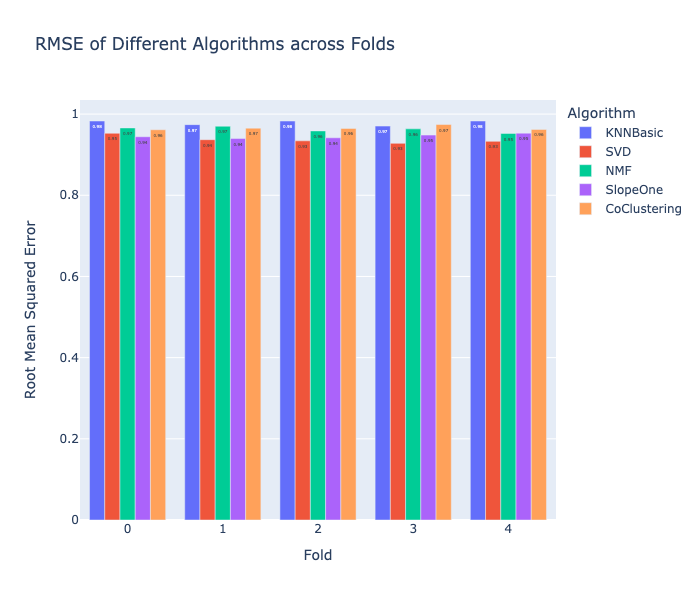

In [16]:
summary_long = summary.melt(id_vars=['fold'], var_name='Algorithm', value_name='RMSE')
mean_rmse = summary_long[summary_long['fold'] == 'mean']
fold_rmse = summary_long[summary_long['fold'] != 'mean']
fig = px.bar(summary_long, x='fold', y='RMSE', color='Algorithm', barmode='group', text_auto='.2f', 
             title='RMSE of Different Algorithms across Folds',
             labels={'fold': 'Fold', 'RMSE': 'Root Mean Squared Error'},
             height=600)
fig.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
pio.write_image(fig, "rmse_across_folds.png", width=1200, height=800, scale=2)
fig.show("png")

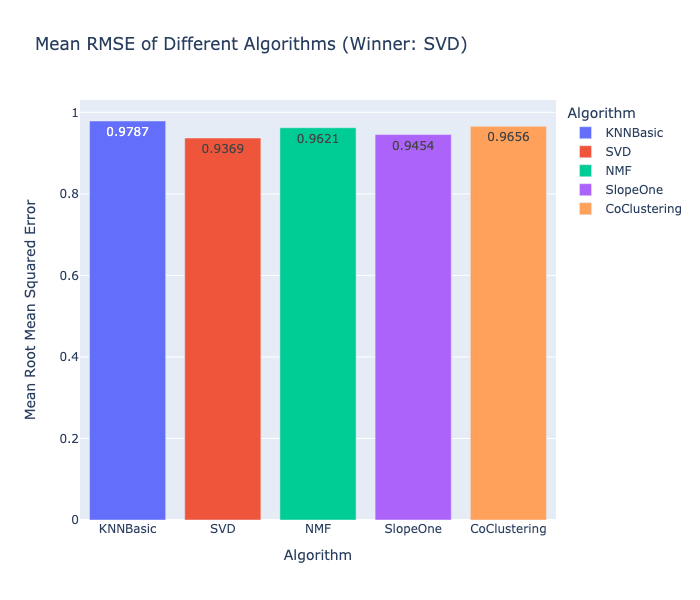

In [17]:
winner = mean_rmse.loc[mean_rmse['RMSE'].idxmin()]['Algorithm']
fig = px.bar(mean_rmse, x='Algorithm', y='RMSE', color='Algorithm', title=f'Mean RMSE of Different Algorithms (Winner: {winner})',
             labels={'Algorithm': 'Algorithm', 'RMSE': 'Mean Root Mean Squared Error'},
             height=600)
fig.update_traces(texttemplate='%{y:.4f}')
pio.write_image(fig, "mean_rmse.png", width=1200, height=800, scale=2)
fig.show("png")